In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import cv2
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [ ]:
df_balanced = pd.read_csv('/content/drive/My Drive/Comp Vis Final Proj/alexis_vers/balanced_data_noimages_withwhite.csv')

In [ ]:
X = np.load('/content/drive/My Drive/Comp Vis Final Proj/alexis_vers/X_balanced_withwhite.npy')

In [ ]:
y_gender = np.array(df_balanced['gender'])
y_age = np.array(df_balanced['age'])
y_race = np.array(df_balanced['race'])

## model

In [ ]:
input_shape = (128,128,1)

In [ ]:
inputs = Input((input_shape))

conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)

conv_2 = Conv2D(32, kernel_size=(3,3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)

conv_3 = Conv2D(32, kernel_size=(3,3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)

conv_4 = Conv2D(32, kernel_size=(3,3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)

flatten = Flatten()(maxp_4)

# Fully connected layers
dense_1 = Dense(256, activation = 'relu')(flatten)
dense_2 = Dense(256, activation = 'relu')(flatten)
# dense_3 = Dense(256, activation = 'relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)
# dropout_3 = Dropout(0.3)(dense_3)

output_1 = Dense(1, activation = 'sigmoid', name = 'gender_out')(dropout_1)
output_2 = Dense(1, activation = 'relu', name = 'age_out')(dropout_2)
# output_3 = Dense(1, activation = 'relu', name = 'race_out')(dropout_3)

# model = Model(inputs = [inputs], outputs = [output_1, output_2, output_3])
model = Model(inputs = [inputs], outputs = [output_1, output_2])

model.compile(loss = ['binary_crossentropy', 'mae'], optimizer = 'adam', metrics = ['accuracy','mae'])

In [ ]:
history = model.fit(x = X, y = [y_gender, y_age], batch_size=32, epochs = 30, validation_split = 0.2)

Epoch 1/30
523/523 [==============================] - 10s 19ms/step - loss: 7.8419 - gender_out_loss: 0.4411 - age_out_loss: 7.4008 - gender_out_accuracy: 0.7955 - gender_out_mae: 0.2956 - age_out_accuracy: 0.0241 - age_out_mae: 7.4008 - val_loss: 6.2672 - val_gender_out_loss: 0.2931 - val_age_out_loss: 5.9741 - val_gender_out_accuracy: 0.8613 - val_gender_out_mae: 0.1882 - val_age_out_accuracy: 0.0191 - val_age_out_mae: 5.9741
Epoch 2/30
523/523 [==============================] - 8s 15ms/step - loss: 6.4688 - gender_out_loss: 0.3324 - age_out_loss: 6.1364 - gender_out_accuracy: 0.8560 - gender_out_mae: 0.2183 - age_out_accuracy: 0.0157 - age_out_mae: 6.1364 - val_loss: 6.3899 - val_gender_out_loss: 0.2991 - val_age_out_loss: 6.0908 - val_gender_out_accuracy: 0.8883 - val_gender_out_mae: 0.1616 - val_age_out_accuracy: 0.0170 - val_age_out_mae: 6.0908
Epoch 3/30
523/523 [==============================] - 9s 17ms/step - loss: 5.9863 - gender_out_loss: 0.2942 - age_out_loss: 5.6921 - gend

In [ ]:
training_metrics = history.history
print("Available metrics:", training_metrics.keys())


Available metrics: dict_keys(['loss', 'gender_out_loss', 'age_out_loss', 'gender_out_accuracy', 'gender_out_mae', 'age_out_accuracy', 'age_out_mae', 'val_loss', 'val_gender_out_loss', 'val_age_out_loss', 'val_gender_out_accuracy', 'val_gender_out_mae', 'val_age_out_accuracy', 'val_age_out_mae'])


In [ ]:
print(training_metrics['val_loss'][-1])

9.141887664794922


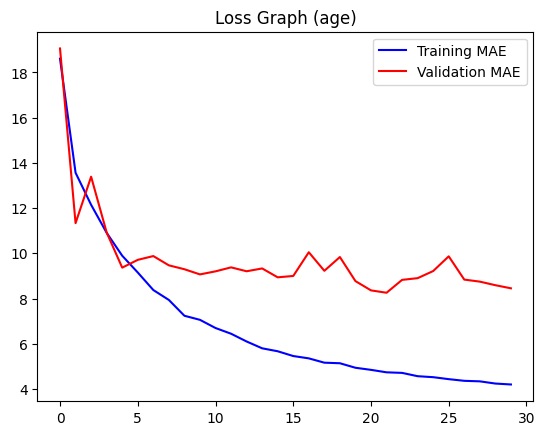

In [ ]:
# Plot results for age
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('Loss Graph (age)')
plt.legend()
plt.show()

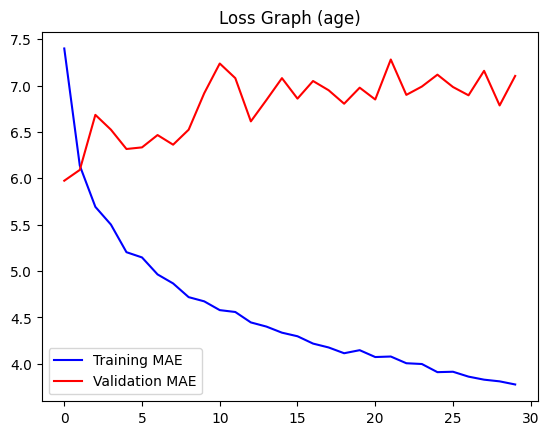

In [ ]:
# Plot results for age
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('Loss Graph (age)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from scipy import stats
# Calculate MAE for each race dataset using the original model
mae_per_race_dataset = {}
for race, data in datasets_per_race.items():
    X_test_race = data['X']
    y_test_race = data['y']

    # Predict age using the original model
    y_pred_race = model.predict(X_test_race)[1]  # Index 1 for age predictions

    # Calculate MAE
    mae_race = mean_absolute_error(y_test_race, y_pred_race)
    mae_per_race_dataset[race] = mae_race

# Print MAE for each race dataset
for race, mae in mae_per_race_dataset.items():
    print(f"MAE for {race}: {mae}")

In [ ]:
gender_dict = {0:'Male', 1:'Female'}
race_dict = {0:'White', 1:'Black', 2:'Asian', 3:'Indian', 4:'Other'}

Original Gender: Male Original Age: 55
1/1 [==============================] - 0s 31ms/step
Predicted Gender: Male Predicted Age: 57


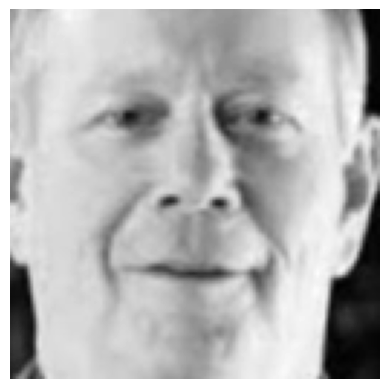

In [ ]:
image_index = 710
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

gender
0    11879
1     9031
Name: count, dtype: int64


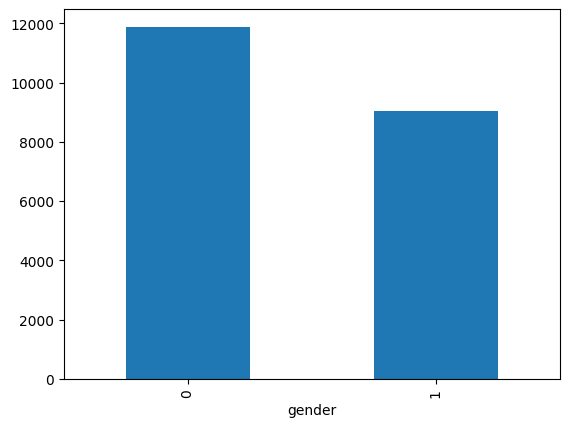

In [ ]:
print(df_balanced['gender'].value_counts())
df_balanced['gender'].value_counts().plot(kind='bar');

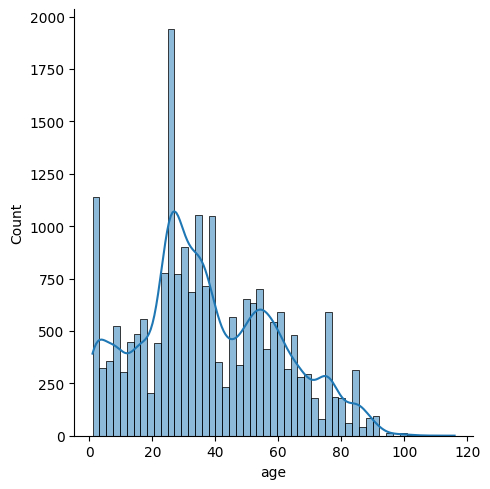

In [ ]:
sns.displot(df_balanced['age'],kde = True);

In [ ]:
race_counts = df_balanced['race'].value_counts()
print(race_counts)

race
0    4201
2    4197
1    4189
3    4184
4    4139
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import mean_absolute_error
from scipy import stats

# Dictionary to store MAE for each race
mae_per_race = {}

# Split the dataset based on race
unique_races = np.unique(y_race)
for race in unique_races:
    race_indices = np.where(y_race == race)[0]
    X_race = X[race_indices]
    y_age_race = y_age[race_indices]

    # Train a model for each race
    model_race = Model(inputs=[inputs], outputs=[output_2])  # Model for age prediction
    model_race.compile(loss='mae', optimizer='adam', metrics=['mae'])
    history_race = model_race.fit(x=X_race, y=y_age_race, batch_size=32, epochs=30, validation_split=0.2, verbose=0)

    # Evaluate the model and calculate MAE
    y_pred_race = model_race.predict(X_race)
    mae_race = mean_absolute_error(y_age_race, y_pred_race)
    mae_per_race[race_dict[race]] = mae_race

# Print MAE for each race
for race, mae in mae_per_race.items():
    print(f"MAE for {race}: {mae}")


130/130 [==============================] - 1s 4ms/step
MAE for White: 3.2909663480056293
MAE for Black: 4.336980501089782
MAE for Asian: 4.705224935003539
MAE for Indian: 3.865344570084238
MAE for Other: 5.656416290363387


In [ ]:
model.save('/content/drive/My Drive/Comp Vis Final Proj/alexis_vers/nowhite_balancedmodel.h5')